# Simulador de quemador de gas


En la siguiente práctica, simularemos el comportamiento de un quemador de gas. El quemador tiene un sensor de temperatura y un actuador que regula la cantidad de gas quemada. El objetivo es mantener la temperatura en 100 grados Celsius. El quemador tiene un comportamiento no lineal, por lo que es difícil de controlar.

Al principio, el quemador está apagado y la temperatura es de 20 grados centígrados. El quemador se enciende y la temperatura aumenta. Cuando la temperatura alcanza los 100 grados Celsius, si apagamos el quemador, la temperatura disminuye. Si encendemos el quemador, la temperatura aumenta y sobrepasamos los 100 grados Celsius. Necesitamos modificar la cantidad de gas que quemamos para mantener la temperatura en 100 grados Celsius de manera constante.


## Pasos previos

Necesitamos instalar la libreria scikit-fuzzy, pero no podemos usar la última versión (0.5), con la 0.4.2 es suficiente.

In [22]:
%pip install scikit-fuzzy==0.4.2 #La libreria 0.5 es más reciente pero tiene problemas con el ControlSystem.view()

# Implementación simple

Primero, implementaremos un controlador simple que intente mantener la temperatura en 100 grados Celsius. El controlador será una función en la que pasamos la temperatura actual y nos devuelve la cantidad de gas que debemos quemar (entre 0 y 100).

In [28]:
def controlador_simple(temperatura):
    # Escribe aquí el código para el controlador simple
    if temperatura < 70:
        return 100
    elif temperatura > 100:
        return 0
    else:
        return 50


## Efecto sobre la temperatura

Dependiendo de la cantidad de gas quemado, la temperatura aumenta o disminuye. Asumiremos que la temperatura aumenta 1 grado Celsius por segundo si quemamos 1 unidad de gas y disminuye 0.5 grados Celsius por segundo si no quemamos nada. Los valores intermedios son proporcionales.

La función será la siguiente:

In [29]:
def temperatura(t_actual, gas):
    gas = gas / 100
    return t_actual + gas - 0.5 * (1 - gas)

## Simulamos el quemador.

Ahora simulemos el quemador. El quemador tiene un sensor de temperatura y un actuador regula la cantidad de gas quemado. El quemador tiene un comportamiento no lineal, por lo que es difícil de controlar. El controlador debe poder mantener la temperatura en 100 grados centígrados.

Visualizamos la temperatura y la cantidad de gas que quemamos durante 100 segundos.

100 21.0
100 22.0
100 23.0
100 24.0
100 25.0
100 26.0
100 27.0
100 28.0
100 29.0
100 30.0
100 31.0
100 32.0
100 33.0
100 34.0
100 35.0
100 36.0
100 37.0
100 38.0
100 39.0
100 40.0
100 41.0
100 42.0
100 43.0
100 44.0
100 45.0
100 46.0
100 47.0
100 48.0
100 49.0
100 50.0
100 51.0
100 52.0
100 53.0
100 54.0
100 55.0
100 56.0
100 57.0
100 58.0
100 59.0
100 60.0
100 61.0
100 62.0
100 63.0
100 64.0
100 65.0
100 66.0
100 67.0
100 68.0
100 69.0
100 70.0
50 70.25
50 70.5
50 70.75
50 71.0
50 71.25
50 71.5
50 71.75
50 72.0
50 72.25
50 72.5
50 72.75
50 73.0
50 73.25
50 73.5
50 73.75
50 74.0
50 74.25
50 74.5
50 74.75
50 75.0
50 75.25
50 75.5
50 75.75
50 76.0
50 76.25
50 76.5
50 76.75
50 77.0
50 77.25
50 77.5
50 77.75
50 78.0
50 78.25
50 78.5
50 78.75
50 79.0
50 79.25
50 79.5
50 79.75
50 80.0
50 80.25
50 80.5
50 80.75
50 81.0
50 81.25
50 81.5
50 81.75
50 82.0
50 82.25
50 82.5
50 82.75
50 83.0
50 83.25
50 83.5
50 83.75
50 84.0
50 84.25
50 84.5
50 84.75
50 85.0
50 85.25
50 85.5
50 85.75
50 86.0
50 86.

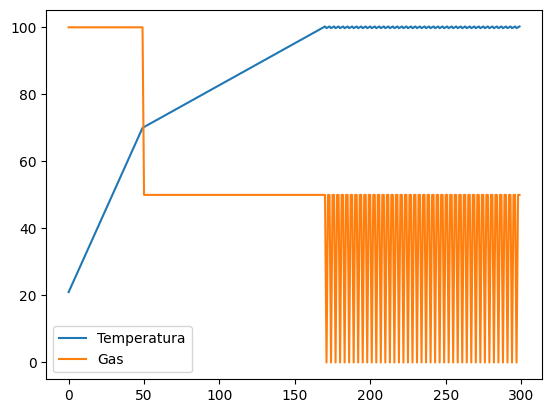

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def simulador(controlador, t_inicial=20, pasos=300):
    temps = np.zeros(pasos)
    gasos = np.zeros(pasos)
    for p in range(pasos):
        gas = controlador(t_inicial)
        t_inicial = temperatura(t_inicial, gas)
        print(gas, t_inicial)
        temps[p] = t_inicial
        gasos[p] = gas

    plt.plot(temps)
    plt.plot(gasos)
    plt.legend(['Temperatura', 'Gas'])
    plt.show()

simulador(controlador_simple)

Podemos ver cómo funciona el sistema pero no es estable. Una vez que la temperatura alcanza los 100 grados, el sistema no puede mantener la temperatura en 100 grados de manera efectiva.

Veamos una forma más efectiva de controlar el sistema.

# Implementación en lógica difusa

La lógica difusa es la herramienta perfecta para este tipo de problema. Nos permite modelar el comportamiento del sistema de manera intuitiva y fácil; devueltos valores continuos en lugar de valores discretos.

Utilizaremos la librería Scikit-Fuzzy para implementar el controlador difuso. Esta librería nos permite definir conjuntos difusos, reglas difusas e inferencia fácilmente.

Primero, definimos los conjuntos difusos que usaremos para modelar el sistema. En este caso, usaremos cuatro conjuntos difusos para modelar la temperatura: muy frio, frío, apropiado y muy caliente. Y cinco conjuntos difusos para modelar la cantidad de gas que quemamos: muy poco, poco, mediano, mucho y total.

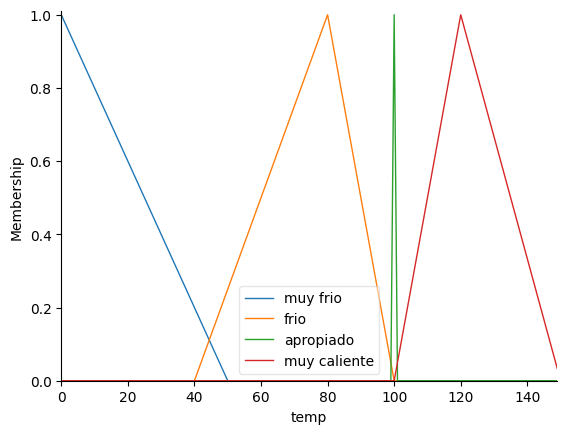

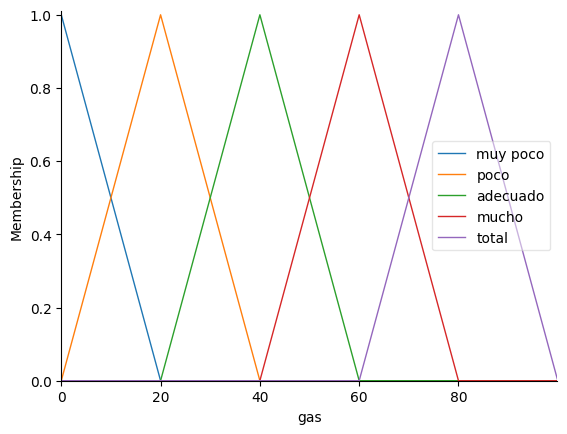

In [33]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# La temperatura objetivo estará en el centro del conjunto apropiado
temperatura_obj = 100

# Definimos el universo del discurso
rango_temperatura = np.arange(0, 150, 1)
rango_gas = np.arange(0, 100, 0.1)

# Definimos los antecedentes y el consecuente
temp = ctrl.Antecedent(rango_temperatura, 'temp')
gas = ctrl.Consequent(rango_gas, 'gas')

# Definimos conjuntos difusos

temp['muy frio'] = fuzz.trimf(temp.universe, [0, 0, 50])
temp['frio'] = fuzz.trimf(temp.universe, [40, 80, 100])
temp['apropiado'] = fuzz.trimf(temp.universe, [99, 100, 101])
temp['muy caliente'] = fuzz.trimf(temp.universe, [100, 120, 150])

gas['muy poco'] = fuzz.trimf(gas.universe, [0, 0, 20])
gas['poco'] = fuzz.trimf(gas.universe, [0, 20, 40])
gas['adecuado'] = fuzz.trimf(gas.universe, [20, 40, 60])
gas['mucho'] = fuzz.trimf(gas.universe, [40, 60, 80])
gas['total'] = fuzz.trimf(gas.universe, [60, 80, 100])

# Visualizamos conjuntos difusos
temp.view()
gas.view()

## Reglas difusas

Ahora definimos las reglas difusas que modelan el comportamiento del sistema.
En este caso, definiremos cinco reglas difusas:
- Si la temperatura es muy fría, quemaremos todo el gas.
- Si la temperatura es fría, quemaremos mucho gas.
- Si la temperatura es apropiada, quemaremos una cantidad adecuada de gas.
- Si la temperatura está caliente, quemaremos poco gas.


In [ ]:
# Escribe aquí las 4 reglas difusas

## Inferencia difusa

Ahora definimos el controlador difuso. El controlador difuso es un sistema difuso que utiliza las reglas difusas para inferir el valor de la salida.
En este caso, el controlador difuso utiliza las reglas difusas para inferir la cantidad de gas que tenemos que quemar para mantener la temperatura en 100 grados Celsius.

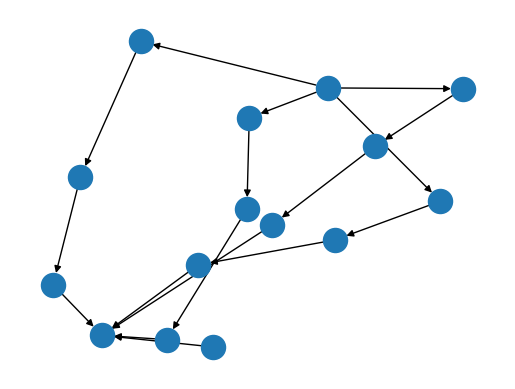

In [ ]:
# Añadelas al Sistema de Control y visualizalas

In [ ]:
controlador_simulador = ctrl.ControlSystemSimulation(controlador)

79.99970336860154 20.699995550529025
79.99969928892038 21.39999103986283
79.99969494912807 22.09998646409975
79.99969033145005 22.7999818190715
79.99968541621061 23.49997710031466
79.99968018158575 24.199972303038447
79.9996746033146 24.899967422088164
79.99966865436352 25.599962451903618
79.99966230453057 26.299957386471576
79.99965551998328 26.999952219271325
79.9996482627039 27.699946943211884
79.99964048984266 28.399941550559525
79.9996321529308 29.099936032853485
79.99962319694698 29.79993038080769
79.99961355918278 30.499924584195433
79.9996031678661 31.199918631713423
79.99959194047636 31.89991251082057
79.99957978166823 32.599906207545594
79.99956658069618 33.299899706256035
79.99955220818705 33.99989298937884
79.99953651206982 34.69988603705989
79.99951931238525 35.39987882674567
79.99950039460315 36.09987133266472
79.99947950091745 36.79986352517848
79.99945631877927 37.49985536996017
79.99943046556619 38.19984682694366
79.9994014678057 38.89983784896075
79.99936873252648 39.

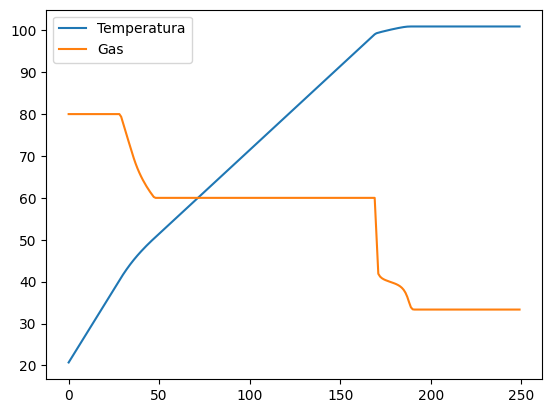

In [ ]:
# Simulamos controlador difuso

def controlador_difuso(temperatura):
    controlador_simulador.input['temp'] = temperatura
    controlador_simulador.compute()
    return controlador_simulador.output['gas']

simulador(controlador_difuso, 20, 250)

# Enfoque alternativo

Un enfoque similar pero con un resultado diferente sería el siguiente: como entrada, recibiremos el error de temperatura (la diferencia entre la temperatura actual y la temperatura objetivo). Como salida, devolveremos la cantidad de gas que debemos quemar.

La diferencia entre este enfoque y el enfoque anterior es que en este caso, el controlador difuso no tiene que saber cuál es la temperatura actual. Solo tiene que saber cuál es la diferencia entre la temperatura actual y la temperatura objetivo. También lo hará más flexible y fácil de reutilizar.

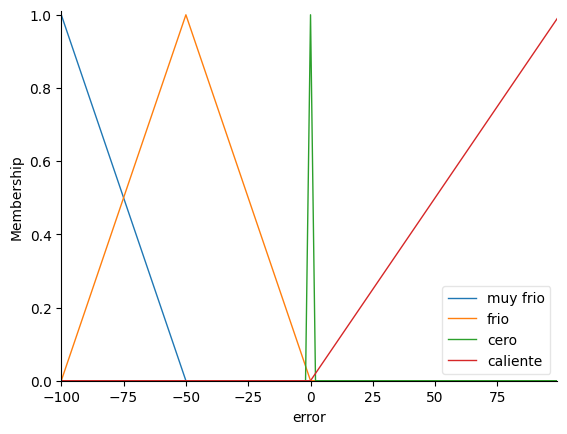

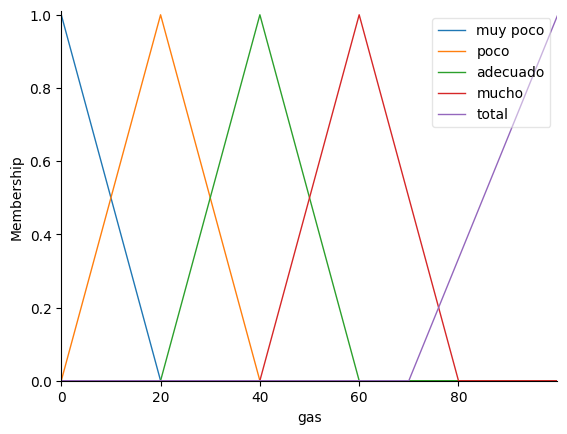

In [ ]:
# Definimos el universo del discurso

teperatura_objetivo = 100

rango_error = np.arange(-teperatura_objetivo, teperatura_objetivo, 1)
rango_gas = np.arange(0, 100, 0.1)

# Definimos los antecedentes y el consecuente
error = ctrl.Antecedent(rango_error, 'error')
gas = ctrl.Consequent(rango_gas, 'gas')

# Definimos conjuntos difusos

## Aquí debes añadir los conjuntos difusos (puedes ayudarte de la imagen inferior)

# Visualizamos conjuntos difusos
error.view()
gas.view()

## Nuevas reglas difusas

Ahora definimos las reglas difusas que modelan el comportamiento del sistema.
En este caso, definiremos solo tres reglas difusas:
- Si la diferencia con la temperatura es frio, quemaremos todo el gas.
- Si la diferencia con la temperatura es cero, quemaremos una cantidad adecuada.
- Si la diferencia con la temperatura es caliente, quemaremos muy poco gas.


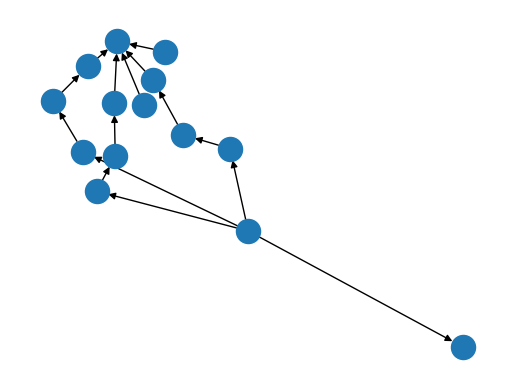

In [ ]:
# Definimos las reglas difusas


# Definimos el controlador difuso

#Y lo visualizamos


87.69895397489567 20.815484309623436
87.79757445999121 21.632447926523305
87.8950225753918 22.450873265154183
87.99124587594876 23.270741953293413
88.08618961861264 24.0920347975726
88.17979664008173 24.91473174717383
88.27200722671579 25.738811855574564
88.36275897614222 26.564253240216697
88.45198664995868 27.39103303996608
88.53962201685002 28.21912737021883
88.62559368542885 29.04851127550026
88.70982692599995 29.87915867939026
88.79224348042524 30.71104233159664
88.87276135916547 31.544133751984123
88.95129462451067 32.378403171351785
89.02775315892173 33.213819468735615
89.1020424173163 34.05035010499536
89.17406316201283 34.88796105242555
89.24371117896345 35.72661672011
89.31087697375241 36.56627987471629
89.37544544572305 37.406911556402136
89.43729553843777 38.248470989478704
89.49629986451761 39.090915487446466
89.55232430272575 39.93420035198735
89.60522756496898 40.778278765461884
89.65486073067143 41.62310167642195
89.70106674574 42.46861767760805
89.74367988309054 43.314

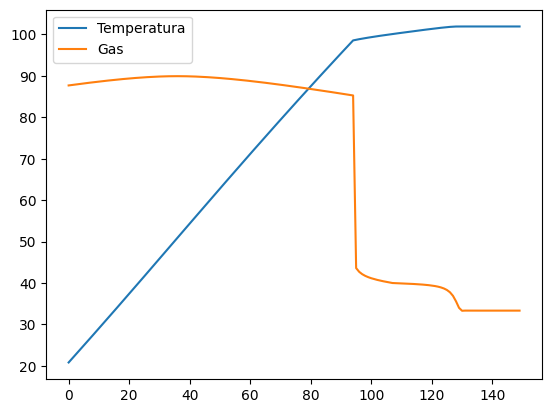

In [ ]:
# Simulamos controlador difuso

controlador_simulador = ctrl.ControlSystemSimulation(controlador)

def controlador_difus(temperatura):
    controlador_simulador.input['error'] = temperatura - teperatura_objetivo
    controlador_simulador.compute()
    return controlador_simulador.output['gas']

simulador(controlador_difus, 20, 150)

# Entrega

Una vez completado el Notebook y ejecutado completamente (comprueba que funcionan todas las celdas). Envialo a la tarea correspondiente de AULES.